In [7]:
import matplotlib.pyplot as plt

from models import TransformerModelLooped
from curriculum import CurriculumSimple
from train import train_without_config, validate_model

n_dims = 10
train_steps=10000
task_name = "linear_regression"

In [8]:
model_loop_b5_b15 = TransformerModelLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=128,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b5_b15 = CurriculumSimple(n_dims, 31, 5, [5000, n_dims, 0], [5000, 31, 0], [1000, 15, 1])

metrics_l1_b5_b15_d10 = train_without_config(
    model_loop_b5_b15, cirriculum_b5_b15, model_n_dims=n_dims, 
    log_every_steps=10, train_steps=train_steps, family="gpt2_loop", 
    do_wandb_log=False, seed=None, task_name=task_name)

number of parameters: 0.20M


  0%|          | 0/10000 [00:00<?, ?it/s]

0


loss 4.312840938568115: 100%|██████████| 10000/10000 [10:26<00:00, 15.97it/s]


In [9]:
model_loop_b5 = TransformerModelLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=128,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b5 = CurriculumSimple(n_dims, 31, 5, [5000, n_dims, 0], [5000, 31, 0], [1000, 5, 0])

metrics_l1_b5_d10 = train_without_config(
    model_loop_b5, cirriculum_b5, model_n_dims=n_dims,
    log_every_steps=10, train_steps=train_steps, family="gpt2_loop",
    do_wandb_log=False, seed=None, task_name=task_name)

number of parameters: 0.20M


loss 10.111343383789062:   0%|          | 0/10000 [00:00<?, ?it/s]

0


loss 5.205576419830322: 100%|██████████| 10000/10000 [12:39<00:00, 13.17it/s]


In [10]:
model_loop_b10 = TransformerModelLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=128,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b10 = CurriculumSimple(n_dims, 31, 10, [5000, n_dims, 0], [5000, 31, 0], [5000, 10, 0])

metrics_l1_b10_d10 = train_without_config(model_loop_b10, cirriculum_b10, model_n_dims=n_dims,
                                          log_every_steps=10, train_steps=train_steps, family="gpt2_loop",
                                          do_wandb_log=False, seed=None, task_name=task_name)

number of parameters: 0.20M


loss 9.555303573608398:   0%|          | 1/10000 [00:00<25:55,  6.43it/s]

0


loss 4.095645904541016: 100%|██████████| 10000/10000 [23:44<00:00,  7.02it/s]


In [11]:
model_loop_b15 = TransformerModelLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=128,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b15 = CurriculumSimple(n_dims, 31, 15, [5000, n_dims, 0], [5000, 31, 0], [5000, 15, 0])

metrics_l1_b15_d10 = train_without_config(model_loop_b15, cirriculum_b15, model_n_dims=n_dims,
                                          log_every_steps=10, train_steps=train_steps, family="gpt2_loop",
                                          do_wandb_log=False, seed=None, task_name=task_name)

number of parameters: 0.20M


  0%|          | 0/10000 [00:00<?, ?it/s]

0


loss 4.149704933166504: 100%|██████████| 10000/10000 [54:07<00:00,  3.08it/s]


In [12]:
model_loop_b5_b10 = TransformerModelLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=128,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b5_b10 = CurriculumSimple(n_dims, 31, 5, [5000, n_dims, 0], [5000, 31, 0], [2000, 10, 1])

metrics_l1_b5_b10_d10 = train_without_config(
    model_loop_b5_b10, cirriculum_b5_b10, model_n_dims=n_dims,
    log_every_steps=10, train_steps=train_steps, family="gpt2_loop",
    do_wandb_log=False, seed=None, task_name=task_name)

number of parameters: 0.20M


  0%|          | 0/10000 [00:00<?, ?it/s]

0


loss 4.942774772644043: 100%|██████████| 10000/10000 [53:23<00:00,  3.12it/s]


In [13]:
def calculate_by_loop(model):
    val_by_loop = []
    loop_steps = []
    for i in range(1, 150):
        val_loss = validate_model(model, n_dims_truncated=10, n_loops=i, model_n_dims=10, n_points=21, family="gpt2_loop", task_name=task_name)
        val_by_loop.append(val_loss / n_dims)
        loop_steps.append(i)
    return loop_steps, val_by_loop

steps_b10, values_b10 = calculate_by_loop(model_loop_b10)
steps_b5, values_b5 = calculate_by_loop(model_loop_b5)
steps_b5_b15, values_b5_b15 = calculate_by_loop(model_loop_b5_b15)
steps_b15, values_b15 = calculate_by_loop(model_loop_b15)
steps_b5_b10, values_b5_b10 = calculate_by_loop(model_loop_b5_b10)

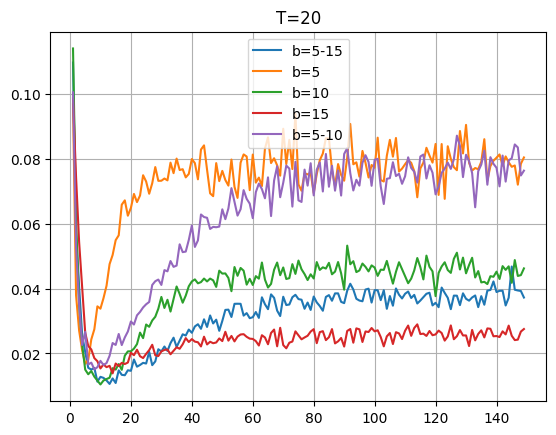

In [14]:
plt.plot(steps_b5_b15, values_b5_b15)
plt.plot(steps_b5, values_b5)
plt.plot(steps_b10, values_b10)
plt.plot(steps_b15, values_b15)
plt.plot(steps_b5_b10, values_b5_b10)
plt.grid()
plt.title("T=20")
plt.legend(["b=5-15", "b=5", "b=10", "b=15", "b=5-10"])
plt.savefig('../images/check_for_scheduling_convergence_properties_train_steps_10000.png')